# Data Cleaning

### Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

### Read in housing data csv

In [28]:
house = pd.read_csv('./data/kc_house_data.csv')

In [17]:
house.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ... sqft_above sqft_basement  yr_built  \
0      5650     1.0        NaN  NONE  ...       1180           0.0      1955   
1      7242     2.0         NO  NONE  ...       2170         400.0      1951   
2     10000     1.0         NO  NONE  ...        770           0.0      1933   
3      5000     1.0         NO  NONE  ...       1050         910.0      1965   
4      8080     1.0         NO  NONE  ...       1680           0.0      1987   

  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0          0.0    98178  47.5112 -122.257           1340        5650   
1       1991.0    98125  47.7210 -122.319           1690        7639   
2          NaN    98028  47.7379 -122.233           2720        8062   
3          0.0    98136  47.5208 -122.393           1360        5000   
4          0.0    98074  47.6168 -122.045           1800        7503   

   grade_value  
0            7  
1            7  
2            6  
3            7  
4            8  

[5 rows x 22 columns]

### Convert date type to datetime

In [29]:
house.date = pd.to_datetime(house.date)

### Split grade into 2 columns of a categorical (grade) and a number value (grade_value)

In [30]:
house[['grade_value', 'grade']] = house.grade.str.split(" ",1, expand=True)

### Convert grade_value to int

In [31]:
house.grade_value = house.grade_value.astype({'grade_value':'int64'})

### Convert sqft_basement to int

In [120]:
#house.sqft_basement = house.sqft_basement.astype('float')

### Removed row of bad data where bedrooms was 33

In [33]:
house.drop(house[house.bedrooms == 33].index,inplace=True)

In [81]:
corr_mat = house.corr(method='pearson')
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
unique_corr = upper_corr_mat.unstack().dropna()
sort_corr = unique_corr.abs().sort_values(ascending=False)
new_corr = sort_corr.to_frame().reset_index()
price_corr = new_corr[(new_corr.level_0 == 'price') | (new_corr.level_1 == 'price')]
price_corr.columns = ['feature1','feature2','corr']

### Top 10 features correlated with price

In [82]:
price_corr.head(10)

feature1 feature2      corr
8     sqft_living    price  0.701929
10    grade_value    price  0.667964
12     sqft_above    price  0.605392
14  sqft_living15    price  0.585267
18      bathrooms    price  0.525915
36       bedrooms    price  0.315961
37            lat    price  0.306687
42         floors    price  0.256820
67   yr_renovated    price  0.129603
73       sqft_lot    price  0.089879

### Create new data frame of the means of the numerical features grouped by the grade values

In [86]:
grades = house.groupby('grade_value').mean()

### Update condition to put on a 1-5 number scale

In [ ]:
house.loc[house.condition == 'Very Good','condition'] = 5

In [ ]:
house.loc[house.condition == 'Good','condition'] = 4

In [ ]:
house.loc[house.condition == 'Average','condition'] = 3

In [ ]:
house.loc[house.condition == 'Fair','condition'] = 2

In [ ]:
house.loc[house.condition == 'Poor','condition'] = 1

### Convert number scaled condition type to int

In [ ]:
house.condition = house.condition.astype('int64')

In [88]:
grades

id         price  bedrooms  bathrooms  sqft_living  \
grade_value                                                                 
3            2.420069e+09  2.620000e+05  1.000000   0.750000   520.000000   
4            4.344409e+09  2.120019e+05  1.592593   0.907407   680.740741   
5            3.887594e+09  2.485240e+05  2.388430   1.113636   983.326446   
6            4.442552e+09  3.019166e+05  2.685967   1.243499  1191.561335   
7            4.527573e+09  4.025681e+05  3.254764   1.829962  1689.522679   
8            4.775134e+09  5.429868e+05  3.481616   2.348928  2184.803627   
9            4.651166e+09  7.737382e+05  3.773231   2.664340  2868.139962   
10           4.404626e+09  1.072347e+06  3.907407   3.006393  3520.299824   
11           4.164541e+09  1.497792e+06  4.160401   3.501880  4395.448622   
12           3.905934e+09  2.202528e+06  4.269663   4.025281  5479.022472   
13           4.125712e+09  3.710769e+06  4.846154   5.096154  7483.076923   

                 sqft_lot    floors   sqft_above     yr_built  yr_renovated  \
grade_value                                                                   
3            12981.000000  1.000000   520.000000  1920.000000      0.000000   
4            15614.777778  1.037037   673.333333  1936.259259    110.000000   
5            24019.909091  1.086777   944.607438  1935.454545     42.057895   
6            12646.953876  1.108685  1068.647694  1942.471050     86.265318   
7            11770.520116  1.296835  1408.466065  1963.616962     74.716750   
8            13514.009068  1.667848  1867.309810  1980.393899     88.236510   
9            20638.515488  1.849140  2554.395411  1988.419120    102.088235   
10           28191.063492  1.892857  3112.086420  1989.569665     87.966774   
11           38372.789474  1.961153  3853.182957  1992.145363     79.598160   
12           54819.213483  1.949438  4647.494382  1992.404494     83.111111   
13           28204.769231  1.961538  6060.769231  1976.615385    362.636364   

                  zipcode        lat        long  sqft_living15    sqft_lot15  
grade_value                                                                    
3            98022.000000  47.208200 -121.995000    1340.000000  12233.000000  
4            98068.629630  47.496170 -122.165148    1486.666667  12896.629630  
5            98082.694215  47.499478 -122.199331    1380.570248  16122.433884  
6            98102.624632  47.533117 -122.262484    1389.247301  11020.924926  
7            98082.410231  47.553418 -122.232870    1679.319180  10616.655299  
8            98073.445837  47.565931 -122.208003    2067.075845  11371.257049  
9            98065.300574  47.575822 -122.165836    2613.460038  17401.707839  
10           98061.300705  47.590851 -122.151960    3036.892416  21334.663139  
11           98055.255639  47.599853 -122.150554    3532.110276  27743.160401  
12           98045.258427  47.596592 -122.144539    3955.988764  39134.078652  
13           98086.153846  47.634285 -122.263077    4005.384615  25529.461538

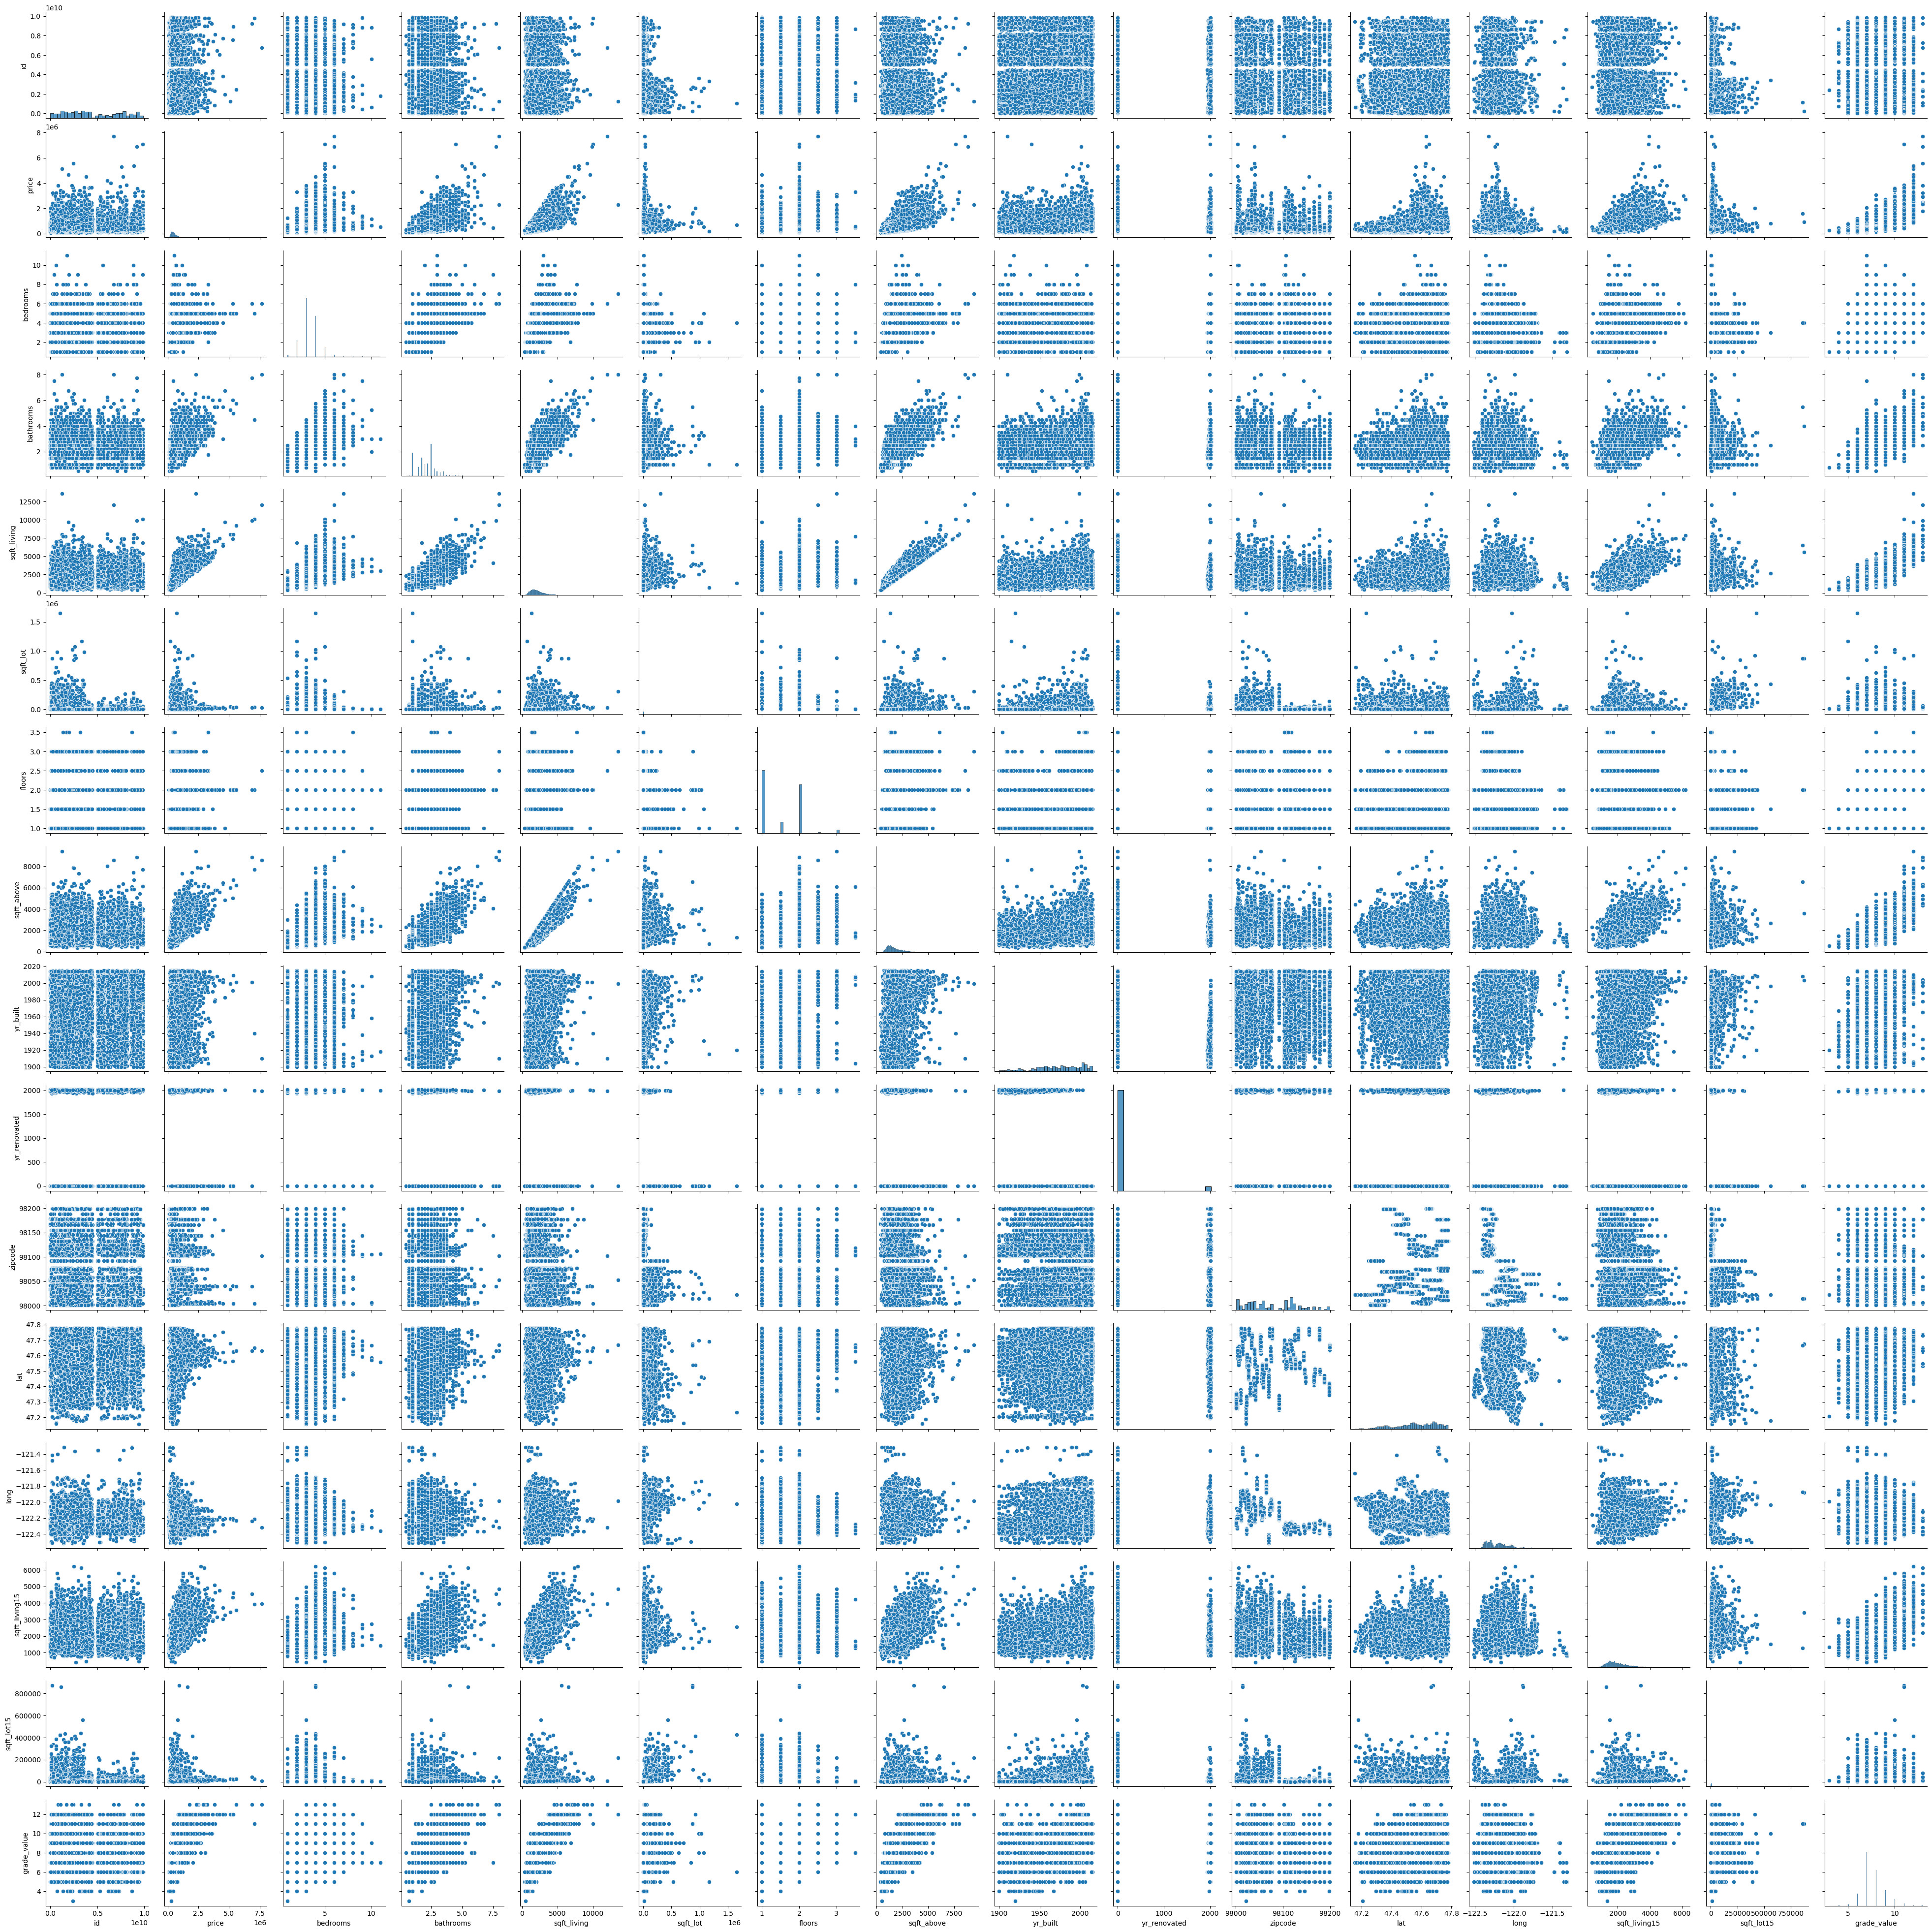

In [37]:
sns.pairplot(house)

In [121]:
#Create new df of all the missing waterfront values to see how to impute missing values
missing_waterfront = house[(house.waterfront != 'YES') & (house.waterfront != 'NO')]

In [94]:
missing_waterfront.view.value_counts()

NONE         2110
AVERAGE       121
GOOD           73
FAIR           39
EXCELLENT      27
Name: view, dtype: int64

In [89]:
house.waterfront.value_counts()

NO     19074
YES      146
Name: waterfront, dtype: int64

In [119]:
house.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [113]:
house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159600e+04  2.159600e+04  21596.000000  21596.000000  21596.000000   
mean   4.580575e+09  5.402920e+05      3.371828      2.115843   2080.343165   
std    2.876764e+09  3.673760e+05      0.904114      0.768998    918.122038   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308950e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors     condition    sqft_above      yr_built  \
count  2.159600e+04  21596.000000  21596.000000  21596.000000  21596.000000   
mean   1.509983e+04      1.494119      3.409752   1788.631506   1971.000787   
std    4.141355e+04      0.539685      0.650471    827.763251     29.375460   
min    5.200000e+02      1.000000      1.000000    370.000000   1900.000000   
25%    5.040000e+03      1.000000      3.000000   1190.000000   1951.000000   
50%    7.619000e+03      1.500000      3.000000   1560.000000   1975.000000   
75%    1.068550e+04      2.000000      4.000000   2210.000000   1997.000000   
max    1.651359e+06      3.500000      5.000000   9410.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  17754.000000  21596.000000  21596.000000  21596.000000   21596.000000   
mean      83.641489  98077.950685     47.560087   -122.213977    1986.650722   
std      399.957185     53.514040      0.138552      0.140725     685.231768   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471100   -122.328000    1490.000000   
50%        0.000000  98065.000000     47.571800   -122.231000    1840.000000   
75%        0.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15   grade_value  
count   21596.000000  21596.000000  
mean    12758.656649      7.657946  
std     27275.018316      1.173218  
min       651.000000      3.000000  
25%      5100.000000      7.000000  
50%      7620.000000      7.000000  
75%     10083.000000      8.000000  
max    871200.000000     13.000000

In [114]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21596 non-null  int64         
 1   date           21596 non-null  datetime64[ns]
 2   price          21596 non-null  float64       
 3   bedrooms       21596 non-null  int64         
 4   bathrooms      21596 non-null  float64       
 5   sqft_living    21596 non-null  int64         
 6   sqft_lot       21596 non-null  int64         
 7   floors         21596 non-null  float64       
 8   waterfront     19220 non-null  object        
 9   view           21533 non-null  object        
 10  condition      21596 non-null  int64         
 11  grade          21596 non-null  object        
 12  sqft_above     21596 non-null  int64         
 13  sqft_basement  21596 non-null  object        
 14  yr_built       21596 non-null  int64         
 15  yr_renovated   1775